# Проект построения модели предсказания оттока клиентов сети фитнес залов и кластеризация клиентов алгоритмами машинного обучения

**План проекта**
    
*Шаг 1*
 - EDA

*Шаг 2*
 - Модели прогнозирования оттока клиентов

*Шаг 3*
 - Кластеризацию клиентов
        
*Шаг 4*  
 - Вывод

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import plotly.express as px


## Шаг 1 EDA

In [2]:
try:
    gym= pd.read_csv('gym_churn.csv')
except: 
    gym =pd.read_csv('/datasets/gym_churn.csv')

In [3]:
#gym = pd.read_csv('gym_churn.csv')

In [4]:
display(gym.head(15))
display(gym.info())# с первого взгляда всё ок с данными, нет пропуском и тд, но нужно смотреть далее
gym.columns = gym.columns.str.lower()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

In [5]:
display(gym.describe())
display(gym['contract_period'].median())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1.0

**Портрет среднестатистичкого клиента выглядит так:**  
- женщин и мужчин практически поровну;
- в основном в зал ходят люди которые либо работают либо проживают рядом (около 84%);
- половина клиентов, это корпоративные клиенты;
- 41% посетителей ходят на групповые занятия;
- в основном клиенты покупают абонемент на 1 месяц;
- средний возраст посетителей 29-30 лет, и что-то нужно делать с ейджихзмом, так как нет посетителей старше 41, а это потеря большой аудитории;
- в среднем пользователи тратят на дополнительные услуги 140 рублей, что очень мало. Это означает что либо нет спроса или предложения, либо много чего бесплатно;
- в среднем клиенты ходят в зал около 3 месяцев;
- в зал ходят редко, около 1-2 раза в неделю, что на самом деле не очень много.

In [6]:
display(gym['gender'].value_counts())
display(gym['near_location'].value_counts())

1    2041
0    1959
Name: gender, dtype: int64

1    3381
0     619
Name: near_location, dtype: int64

In [7]:
display(gym.groupby(['churn']).describe())
display(gym.groupby(['churn']).mean())


gender                                              near_location  \
        count      mean       std  min  25%  50%  75%  max         count   
churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                 ... avg_class_frequency_total            \
           mean  ...                       75%       max   
churn            ...                                       
0      0.873086  ...                  2.732944  6.023668   
1      0.768143  ...                  1.956438  3.478646   

      avg_class_frequency_current_month                                     \
                                  count      mean       std  min       25%   
churn                                                                        
0                                2939.0  2.027882  1.018994  0.0  1.297021   
1                                1061.0  1.044546  0.770237  0.0  0.421337   

                                     
            50%       75%       max  
churn                                
0      2.046697  2.740648  6.146783  
1      0.979445  1.588576  3.540271  

[2 rows x 104 columns]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
gym_churn_1 = gym.query('churn == 1') # сделаем 2 датафрейма, что бы посмотреть гистограмы как общие
gym_churn_0 = gym.query('churn == 0') # так и отдельно по групам отока и нет



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


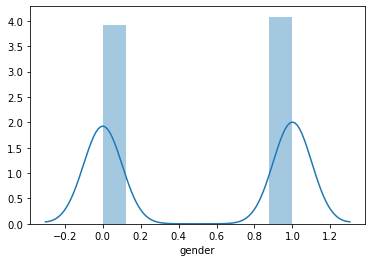

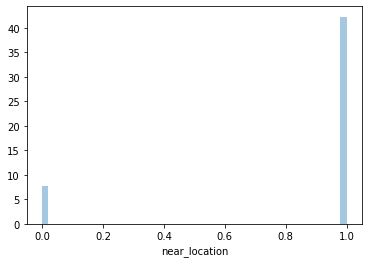

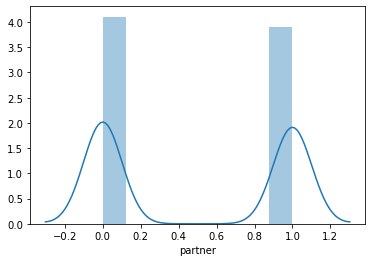

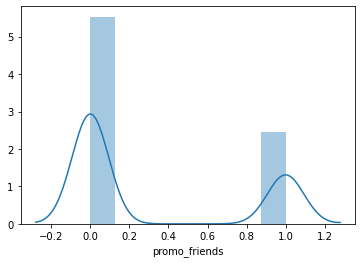

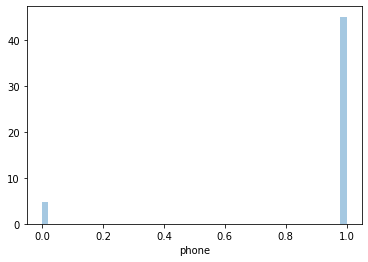

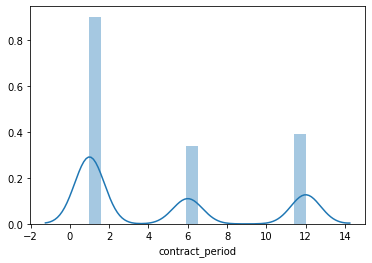

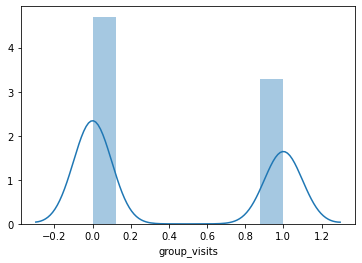

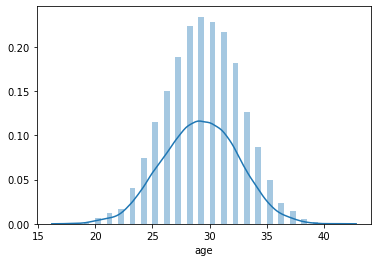

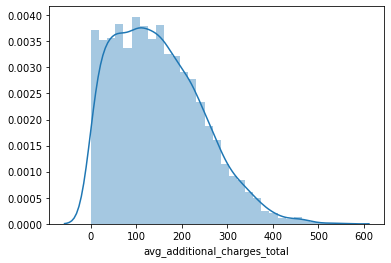

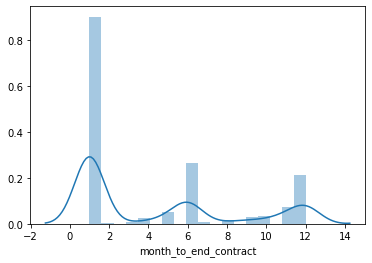

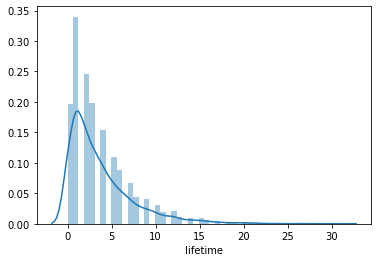

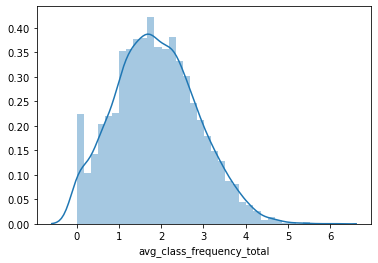

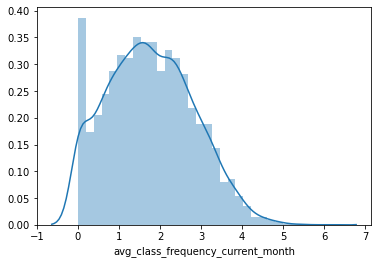

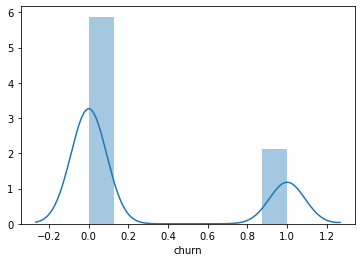

In [9]:
for i, col in enumerate(gym.columns):
    plt.figure(i)
    sns.distplot(gym[col])
    
    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data

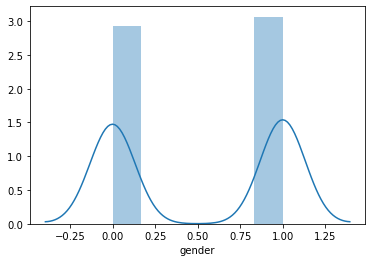

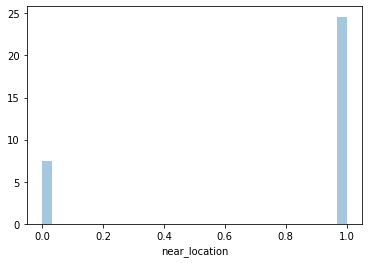

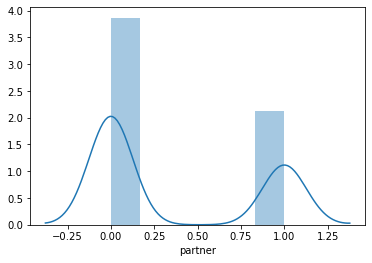

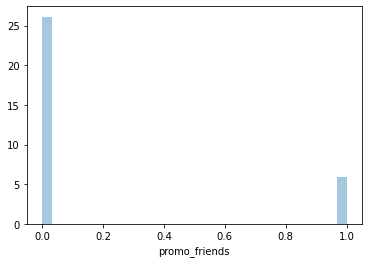

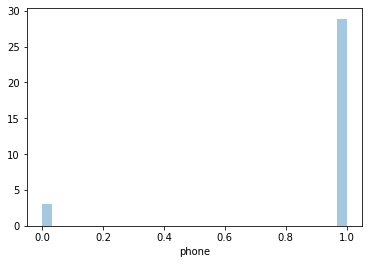

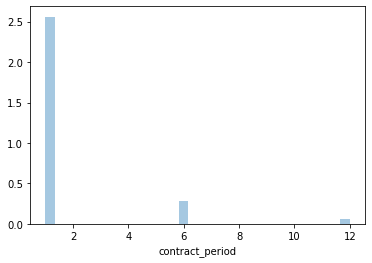

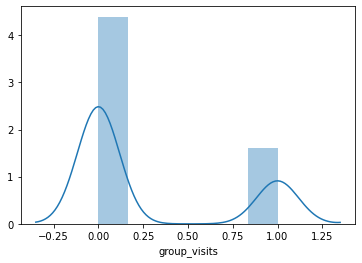

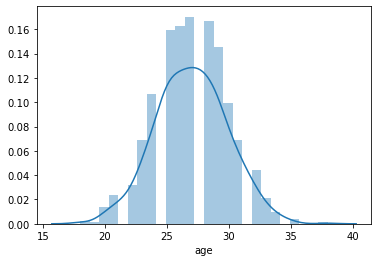

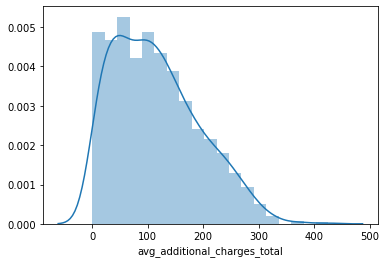

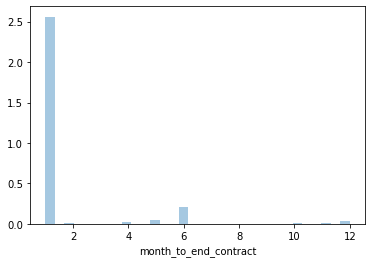

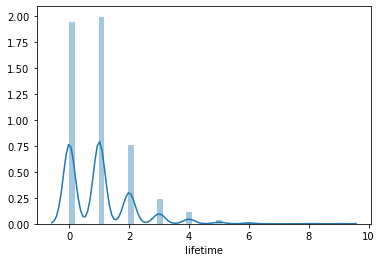

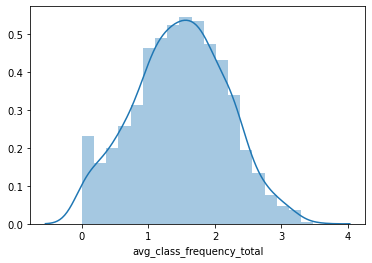

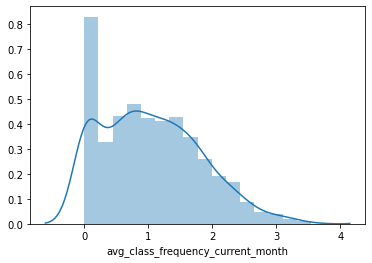

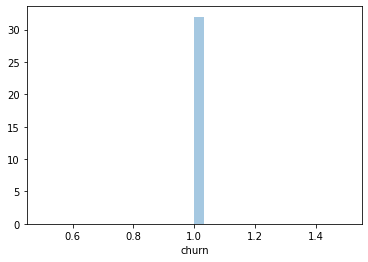

In [10]:
for i, col in enumerate(gym_churn_1.columns):
    plt.figure(i)
    sns.distplot(gym_churn_1[col])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


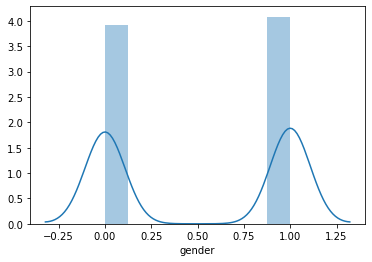

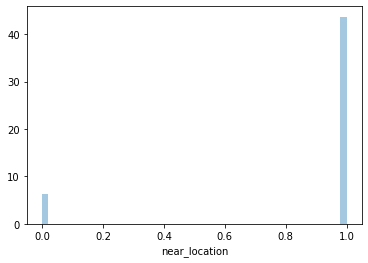

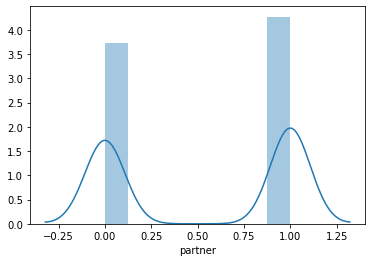

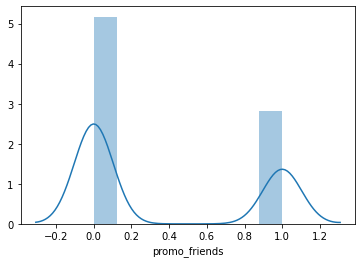

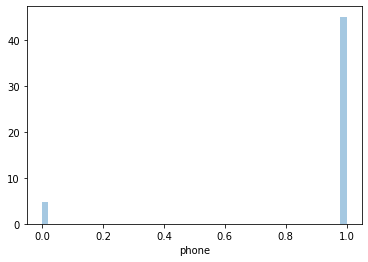

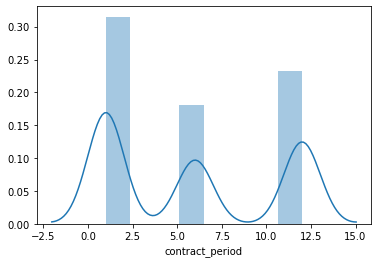

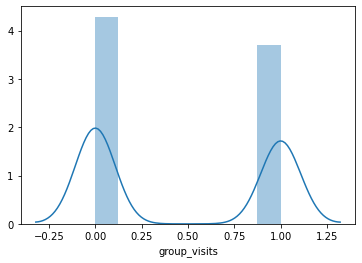

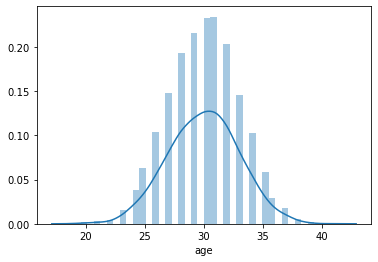

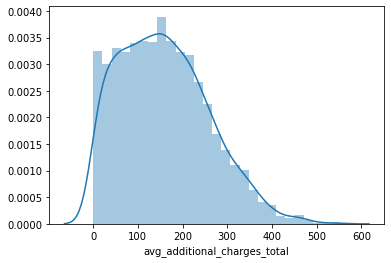

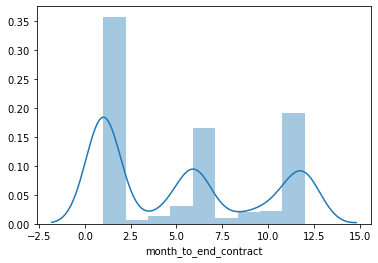

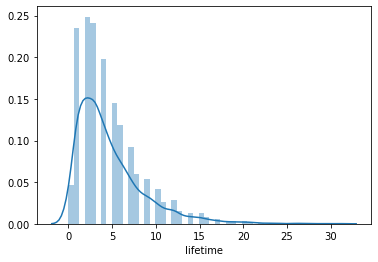

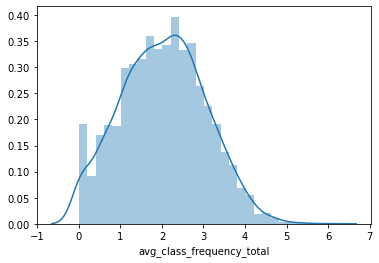

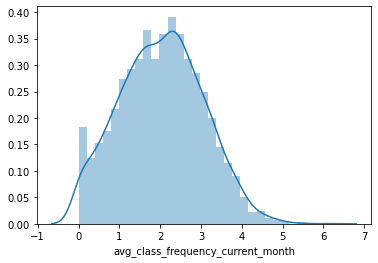

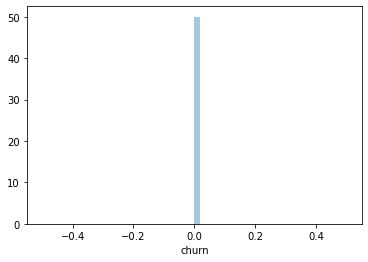

In [11]:
for i, col in enumerate(gym_churn_0.columns):
    plt.figure(i)
    sns.distplot(gym_churn_0[col])

**Построив графики можно сказать, что распределние мы имеем визуально нормальное распределение по таким показателям (где не бинарное данные):**  
- age
в остальных случаях распределение сложно назвать нормальнымы, а именно в таких столбцах: avg_class_frequency_current_month, avg_class_frequency_total, lifetime, avg_additional_charges_total, month_to_end_contract
**Отличия и сходства между группами оттока и не оттока**
*Сходства:*
- по гендерному признаку
- телефон (но это не очень релевантный показатель);
- возраст плюс минус одинаковый;
- затраты на дополнительный услгуги более менее схожи  
*Отличия:*
- в группе оттока, больше людей которые живут или работают не рядом с залом;
- в группе оттока намного меньше людей которые пришли по партнерской программе или по промо от друга;
- группа оттока в основном берет абонимент на мксяц, что может говорить о том что, клиенты присматриваются к залу и не приняли решения окончательного;
- много в группе оттока любителей групповых занятий, что может говорить о том что люди хотят всё попробовать а потом уже решить, брать дальше абонемент или нет;
- разная продолжительность, что логично учитывая что группа оттока берет в основном абонемент на месяц.

**Построим матрицу корелляцй в heatmap**

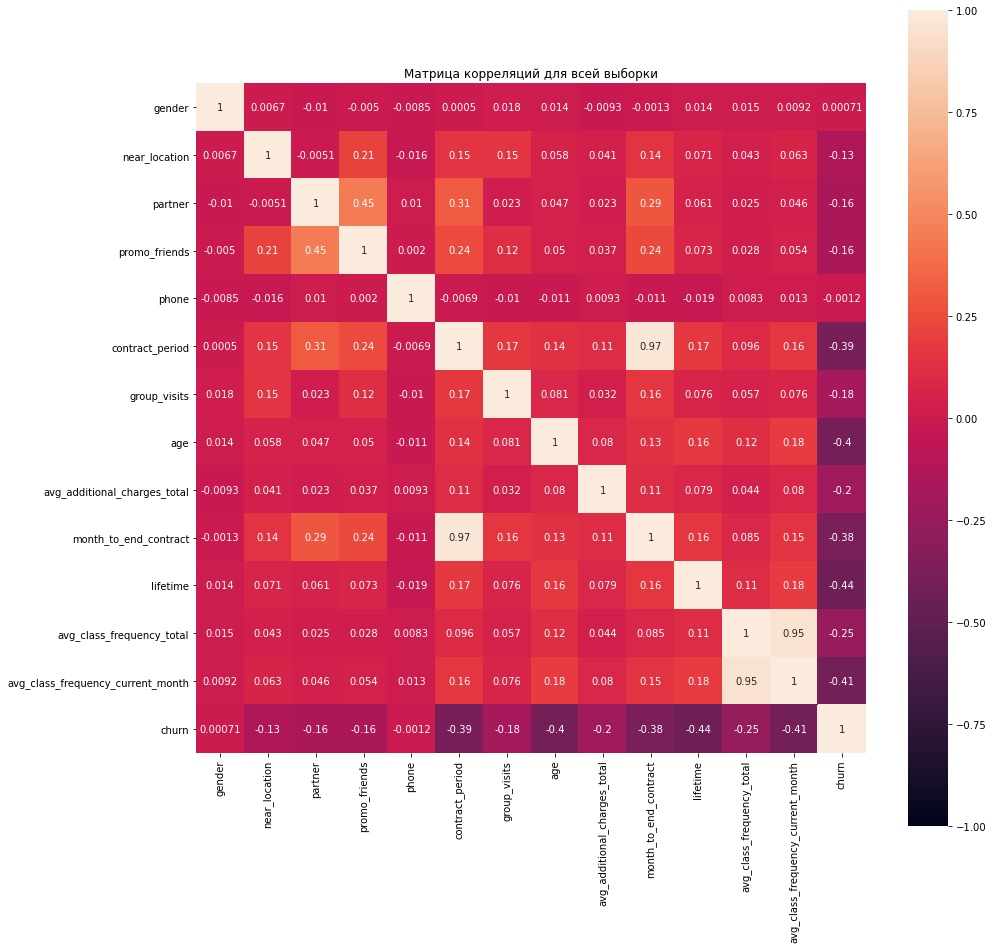

In [12]:
plt.figure(figsize=(15,15))
plt.title('Матрица корреляций для всей выборки')
sns.heatmap(gym.corr(), vmin=-1, vmax=1, annot=True,square=True)
plt.show()

В матрице корреляций мы видим что у нас есть сильно коррелирующие признаки, такие как avg_class_freq_total и этот де показатель за месяц (что более менее логично), contract_period and month_to_end_contract. А вот по целевому признаку churn у нас нет сильно выделяющих взаимосвзяцей, можно только отметить, что много отрицательной корреляции, но и её уровень не превышает -0,44 что не так уж и много.

## Шаг 2. Строим модели прогнозирования оттока клиентов


**Разбиваем данные на обучающую и валидационную выборку**

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
x = gym.drop('churn', axis = 1)
y = gym['churn']

In [14]:
# разделяем модель на обучающую и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 0,stratify=y)

# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(x_train)

# Преобразуем обучающие и валидационные наборы данных
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)


In [15]:
# функция, которая будет выводить наши метрики accuracy, precision , recall and roc
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


## Логистическая регрессия

In [16]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0,solver='lbfgs')
# обучим модель
lr_model.fit(x_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(x_test_st)
lr_probabilities = lr_model.predict_proba(x_test_st)[:,1]
# выведем predictions, probabilities и метрики
display(lr_predictions)
display(lr_probabilities)
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

array([9.08754843e-01, 3.58070159e-02, 6.23888711e-03, 2.18390694e-02,
       1.10710225e-02, 1.39205473e-03, 2.31066628e-05, 5.92801238e-02,
       9.97251318e-01, 8.12303352e-03, 5.05014502e-04, 3.17942327e-01,
       1.67687017e-03, 9.82875660e-01, 8.27406352e-01, 1.11928656e-02,
       6.32134142e-02, 2.32925612e-01, 2.93278539e-01, 1.26287156e-04,
       2.47682930e-01, 8.35774463e-01, 2.58311844e-01, 1.69414621e-03,
       9.87729741e-01, 2.22777325e-01, 5.23515189e-01, 1.00753729e-05,
       4.35660760e-03, 2.55175854e-03, 3.85024686e-01, 7.84162512e-04,
       1.94430610e-04, 5.33822005e-01, 1.15810188e-02, 2.64600487e-02,
       1.03160661e-02, 1.52952312e-05, 3.66424254e-03, 4.88778684e-04,
       6.94517316e-06, 1.00429615e-02, 1.49876046e-05, 9.97490222e-01,
       1.80885401e-05, 6.71015107e-07, 1.49531281e-02, 9.23410497e-01,
       2.39868659e-03, 7.51684506e-03, 2.04286023e-01, 5.11310488e-01,
       8.37461131e-03, 1.07484393e-02, 9.43950525e-01, 9.32762364e-04,
      

Метрики для модели логистической регрессии:
Accuracy: 0.94
Precision: 0.90
Recall: 0.85
ROC_AUC: 0.98


## Случайный лес

In [17]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(x_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(x_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(x_test_st)[:,1]# Ваш код здесь
# выведем все метрики
display(rf_predictions)
display(rf_probabilities)
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

array([0.95, 0.13, 0.02, 0.02, 0.06, 0.03, 0.01, 0.26, 0.92, 0.01, 0.01,
       0.33, 0.  , 0.92, 0.62, 0.11, 0.2 , 0.34, 0.38, 0.01, 0.07, 0.77,
       0.26, 0.  , 0.85, 0.27, 0.3 , 0.03, 0.07, 0.  , 0.56, 0.04, 0.05,
       0.51, 0.22, 0.05, 0.09, 0.19, 0.  , 0.01, 0.  , 0.05, 0.01, 0.97,
       0.  , 0.  , 0.07, 0.87, 0.  , 0.  , 0.14, 0.43, 0.01, 0.01, 0.87,
       0.05, 0.04, 0.  , 0.19, 0.01, 0.98, 0.04, 0.  , 0.01, 0.98, 0.07,
       0.06, 0.16, 0.31, 0.29, 0.14, 0.  , 0.78, 0.2 , 0.18, 0.07, 0.93,
       0.  , 0.  , 0.11, 0.  , 0.12, 0.03, 0.97, 0.03, 0.02, 0.07, 0.76,
       0.02, 0.69, 0.88, 0.01, 0.04, 0.11, 0.9 , 0.01, 0.14, 0.47, 0.95,
       0.02, 0.02, 0.  , 0.01, 0.02, 0.  , 0.57, 0.  , 0.99, 0.11, 0.03,
       0.04, 0.63, 0.05, 0.13, 0.03, 0.  , 0.07, 0.18, 0.08, 0.  , 0.  ,
       0.18, 0.86, 0.99, 0.58, 0.15, 0.46, 0.02, 0.04, 0.32, 0.  , 0.46,
       0.08, 0.07, 0.06, 0.02, 0.04, 0.6 , 0.18, 0.87, 0.1 , 0.05, 0.11,
       0.  , 0.92, 0.11, 0.99, 0.  , 0.06, 0.64, 0.

Метрики для модели случайного леса:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83
ROC_AUC: 0.97



**Исходя из проверки по метрикам accuracy, precision, recall and roc_auc мы можем сделать вывод, что предсказания по логистической регрессии у нас немного лучше чем у случайного леса, поэтому будем использовать эту модель для предсказаний**

In [18]:
feature_weights = lr_model.coef_ [0] 
display(feature_weights)

array([-0.00610063, -0.05252933, -0.06647922, -0.14341332, -0.02242099,
       -0.70363945, -0.40141444, -1.16706738, -0.57129918, -0.6319725 ,
       -3.5812566 ,  3.11196184, -4.21340956])

# Вывод
Мы выбрали модель логистической регресии, и она нам показывает, что самый важный признак это среднее посещения залов

## Шаг 3 Делаем кластеризацию клиентов

In [19]:
#датафрейм для кластеризации без churn
gym_claster = gym.drop('churn', axis = 1)


## Строим дендограмму кластеризации

In [20]:
# стандартизируем данные перед работой с алгоритмами
sc = StandardScaler()
x_sc = sc.fit_transform(gym_claster)

linked = linkage(x_sc, method = 'ward') 

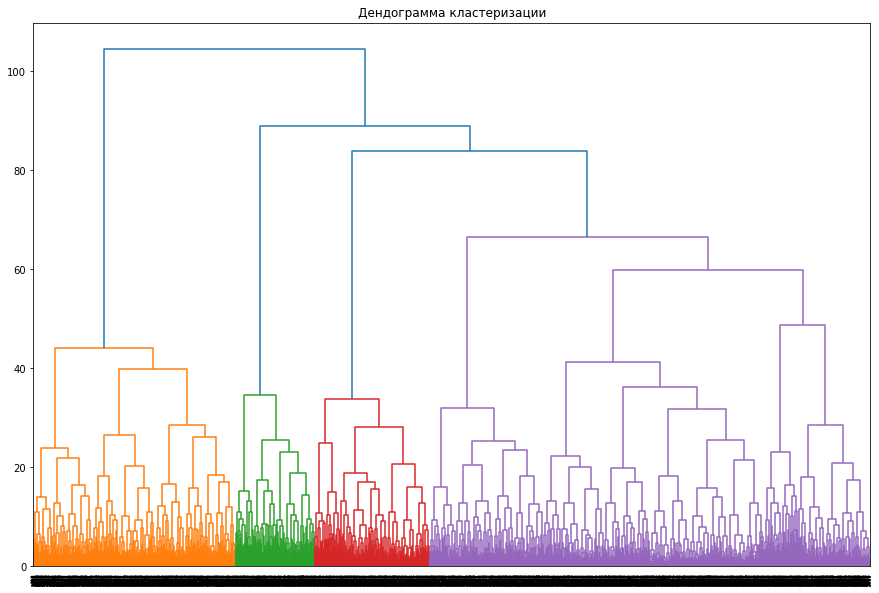

In [21]:
plt.figure(figsize=(15, 10))  
plt.title('Дендограмма кластеризации')
dendrogram(linked, orientation='top')
plt.show() 

## Кластеризация K-Means

In [22]:
km = KMeans(n_clusters = 5,random_state = 0) # задаём число кластеров, равное 5
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров 
# сохраняем метки кластера в поле нашего датасета
gym['cluster'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
display(gym.groupby(['cluster']).mean())
#display(gym.groupby(['cluster']).count())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


In [23]:
#Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация.
silhouette_score(x_sc, labels)

0.11807475877213293

Метрика силуэта показывает нам, что кластерищация более менее качественная

In [24]:
#делаем функцию для построения boxplot
def boxplt(data):
    for columns in data:
        plt.figure(figsize=(10,5))
        sns.boxplot(x = 'cluster', y = data[columns], data=data)
        plt.show()

In [25]:
#создаем для удобства датафрейм для построения boxplot только для непрерывных и небинарных данных 
gym_boxplot = gym[['age', 'avg_additional_charges_total','month_to_end_contract','lifetime',
                   'avg_class_frequency_total', 'avg_class_frequency_current_month', 'cluster']]
display(gym_boxplot.head())



,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster
0,29,14.227470,5.0,3,0.020398,0.000000,0
1,31,113.202938,12.0,7,1.922936,1.910244,4
2,28,129.448479,1.0,2,1.859098,1.736502,3
3,33,62.669863,12.0,2,3.205633,3.357215,4
4,26,198.362265,1.0,3,1.113884,1.120078,3


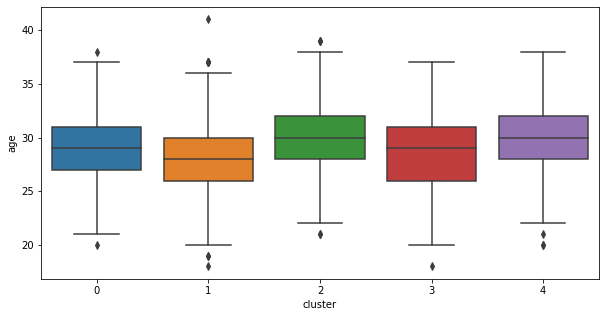

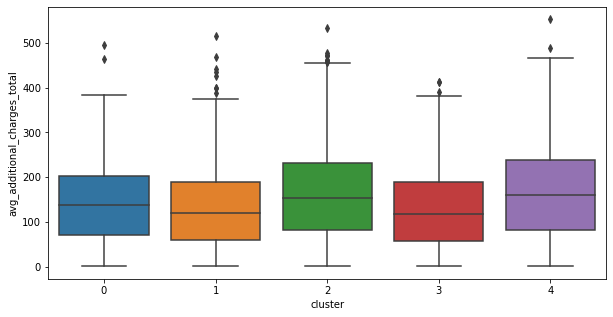

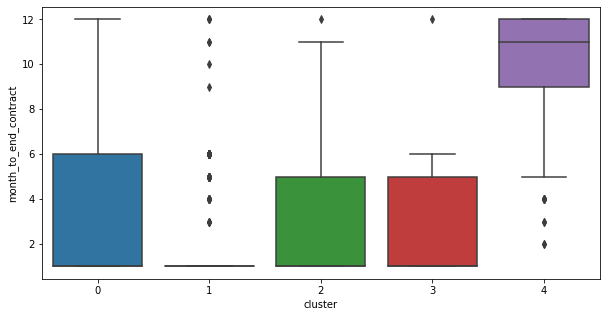

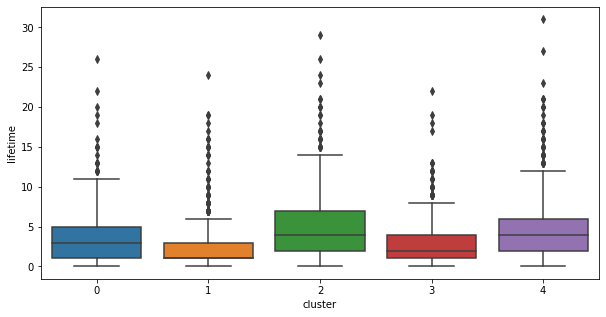

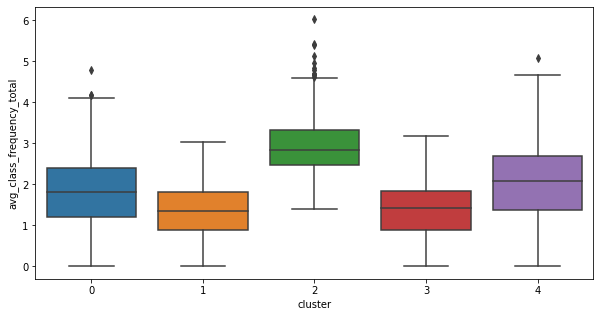

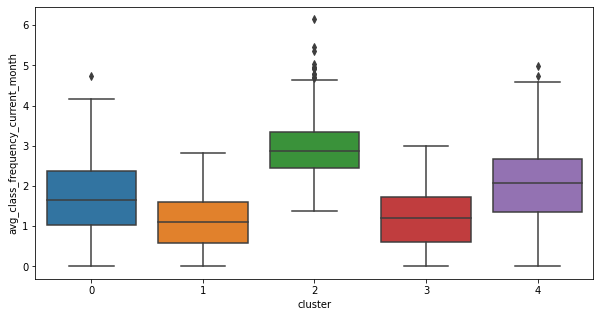

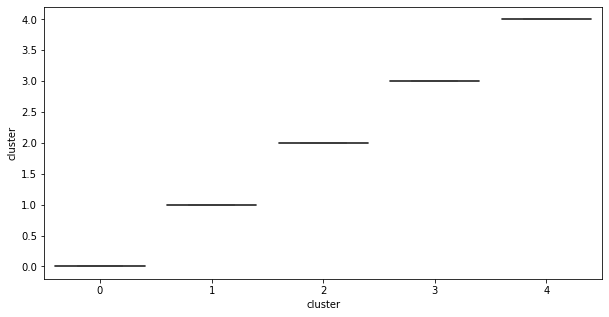

None

In [26]:
display(boxplt(gym_boxplot))


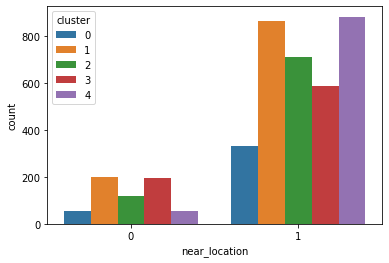

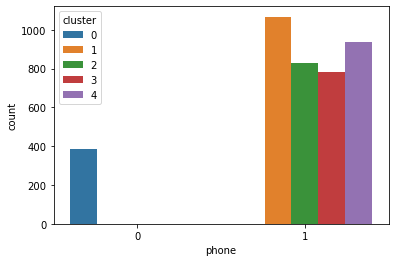

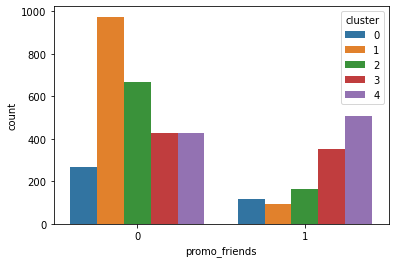

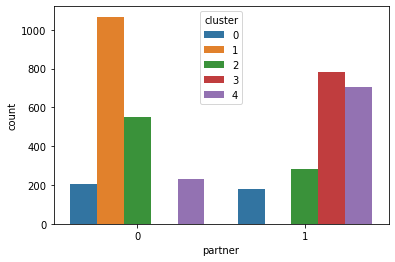

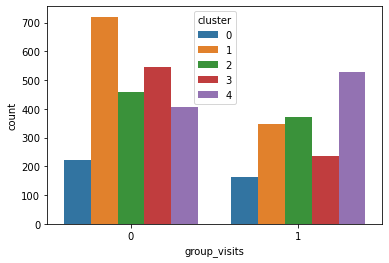

In [27]:

display(sns.countplot(x="near_location", hue="cluster", data=gym))
plt.show()
display(sns.countplot(x="phone",  hue="cluster", data=gym))
#gender	near_location	partner	promo_friends	phone	contract_period	group_visits
plt.show()
display(sns.countplot(x="promo_friends",  hue="cluster", data=gym))
plt.show()
display(sns.countplot(x="partner", hue="cluster", data=gym))
plt.show()
plt.show()
display(sns.countplot(x="group_visits", hue="cluster", data=gym))
plt.show()

In [28]:
cluster_0 = gym.query('cluster == 0')
cluster_1 = gym.query('cluster == 1')
cluster_2 = gym.query('cluster == 2')
cluster_3 = gym.query('cluster == 3')
cluster_4 = gym.query('cluster == 4')

In [29]:
display(cluster_0['churn'].describe())


count    385.000000
mean       0.267532
std        0.443248
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: churn, dtype: float64

In [30]:
display(cluster_1['churn'].describe())


count    1067.000000
mean        0.550141
std         0.497713
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

In [31]:
display(cluster_2['churn'].describe())


count    831.000000
mean       0.048135
std        0.214180
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: churn, dtype: float64

In [32]:
display(cluster_3['churn'].describe())


count    781.000000
mean       0.395647
std        0.489302
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: churn, dtype: float64

In [33]:
display(cluster_4['churn'].describe())


count    936.000000
mean       0.023504
std        0.151580
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: churn, dtype: float64

### Вывод
Построенная дендограмма, показывает нам, что у нас 4 кластра, а по кластеризации K-Means мы вручную задали 5 кластеров, что в даном случае не критично, но исходя из дендограмы можно было отталкиватсья что у нас 4 кластера, и задавать количество кластеров в K-Means тоже 4. Что интересно, при кластеризации в K-Means у нас есть очень характерные кластеры, а именно:  
- 0 кластер, где клиенты не указали номер телефона, по этому признаку и разбито на кластер
- 1 кластер, где все клиенты, не корпоративнык
- 3 кластер, противоположность 2, тут наоборот все клиенты корпортативные

Также можно сказать, что кластеры 2 и 4 надежны и не склонны к оттоку, в то время как 0,1,3 кластеры менее "надежны" и уровень оттока там значительный, в 1 и 3 это почти половина клиентов попали в группу оттока в этих кластерах

## Шаг 4 Общие выводы и рекомендации

Протестировав логистическую регрессию и случайное дерево, мы остановились, на то логистическая регрессия по метрикам проверки моделей в нашем слуаче работатет лучше чем случайный лес, и "важным признаком" в регресси являеться среднее посещения зала за весь период.  
Сделав кластеризацию 2 методами, мы видим что дендограмма строит на 4 кластера, в то время как в K-Means мы брали 5 кластеров. У нас есть кластеры которые сформированны по определенным признакам (например наличие телефоного номера, либо месторасположение), и клстеры 2 и 4 самые "сильные" так как там группы оттока состовляют около 2% и 7% от общего числа выборки, что очень даже хорошо

**Рекомендации:** 
- Отлично себя показывают люди которые живут либо работают рядом со спортзалом, они реже попадают в группу оттока и являютсья более активнимы посителями. Поэтому предлагаю ориентироваться на бизнесы которые расположенны в районе залов, расширяя сеть клиентов именно этой группой делая выгодные предложения для работодателей;
- На удержание клиента, хорошо работает тот факт похода на групповые занятия. Если клиент ходил на них, то и вероятность того что он перестанет ходить меньше, так как такие вещи больше "засасывають" людей (более эмоционально чем просто поход в качалку), поэтому предлагаю делать несколько групповых занятий бесплатными, что бы люди больше втягивались в процес посещения зала, заводили новые контакты и тд;